# Name: Mehrose Tanveer             Email: h22mehrt@du.se

In [17]:
#Step 1 for both questions(Task 1 and Task 2)

#libraries for task 1
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans 
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from matplotlib.pyplot import figure 
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 


In [2]:
#Step 2

# loading data from .txt file in variable IKEA_df
# \t is for arranging the sparate the columns
# encoding="ISO-8859-1" is for encoding becasue data is saved in .txt file
IKEA_df = pd.read_csv("ikea_kommun_data.txt", sep='\t' ,encoding="ISO-8859-1")

In [3]:
#Step 3
#checking the first five entries of the data set by calling gead function
IKEA_df.head()

,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border
0,2583,2010,Haparanda,1078,276,10059,719,0.071478,195.74174,111.075774,0,1
1,880,2010,Kalmar,3790,1621,62815,8716,0.138757,117.17365,390.516869,0,0
2,1780,2010,Karlstad,4560,1910,85753,13308,0.155190,119.64794,469.856708,0,0
3,114,2010,Upplands Väsby,1366,708,39289,4419,0.112474,96.69215,140.750935,0,0
4,115,2010,Vallentuna,171,99,30114,3843,0.127615,86.56347,17.619627,0,0


In [4]:
#info function for getting the information regarding data i.e. data column name, types etc
IKEA_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Kommun_code            207 non-null    int64  
 1   Year                   207 non-null    int64  
 2   Kommun_name            207 non-null    object 
 3   Revenue                207 non-null    int64  
 4   Employee               207 non-null    int64  
 5   Population             207 non-null    int64  
 6   Population_University  207 non-null    int64  
 7   Percent_University     207 non-null    float64
 8   Productivity           207 non-null    float64
 9   SalesIndex             207 non-null    float64
 10  Infrast                207 non-null    int64  
 11  Border                 207 non-null    int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 19.5+ KB


From above information we can see that we have 207 rows and 12 columns in total 
with 8 integers, 3 flot and 1 object(kommun_name) datatypes. There is no missing values in the data because above information
shows non-null.

In [5]:
#Here we are calling describe function for getting the sense of the that. 
#On bases of the result we can decide which informtion is usefull for us(which information we could be droped)

IKEA_df.describe()

,Kommun_code,Year,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border
count,207.000000,207.0,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,1049.734300,2010.0,1031.801932,523.038647,34543.396135,4660.106280,0.097461,91.454002,106.315583,0.048309,0.038647
std,541.065455,0.0,2694.889549,1463.194427,66882.499740,14403.495784,0.040760,27.960867,277.678055,0.214939,0.193220
min,114.000000,2010.0,11.000000,2.000000,3672.000000,174.000000,0.046142,19.898880,1.133426,0.000000,0.000000
25%,582.500000,2010.0,110.000000,64.500000,10785.500000,788.500000,0.069015,74.700910,11.334263,0.000000,0.000000
50%,1263.000000,2010.0,252.000000,142.000000,16515.000000,1598.000000,0.086601,90.457050,25.965765,0.000000,0.000000
75%,1461.500000,2010.0,825.500000,435.000000,37922.000000,4073.500000,0.112085,104.008805,85.058489,0.000000,0.000000
max,2583.000000,2010.0,32897.000000,18795.000000,847073.000000,191585.000000,0.269646,275.636330,3389.665819,1.000000,1.000000


We can drop the following columns:
    year: because it has same value(2010) in every
    Kommun_code: information of this column is not usefull. 
    Kommun_name: information of this column is not usefull.
        

In [6]:
#Step 4

# creates a list of cities with IKEA stores by using isin() method to check if each row's Kommun_name value is in that list.
# Adding a new column name as Has_IKEA and By using astype() we convert values in integers. 

IKEA_cities = ["Linköping", "Borlänge", "Gävle", "Göteborg", "Haparanda", "Jönköping", 
               "Kalmar", "Karlstad", "Malmö", "Stockholm", "Sundsvall", "Uddevalla",                
               "Umeå", "Uppsala", "Västerås", "Älmhult", "Örebro"]

IKEA_df['Has_IKEA'] = IKEA_df['Kommun_name'].isin(IKEA_cities).astype(int)

In [7]:
#Step 5

#Here creating new data set by or saving data in new variable name as IKEA_df_cleaned by droping the 2 columns 
#Kommun_name and Kommun_code and showing the result of 20 rows by calling head()

IKEA_df_cleaned = IKEA_df.drop(['Kommun_name', 'Kommun_code'], axis=1)

IKEA_df_cleaned.head(20)

,Year,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,Has_IKEA
0,2010,1078,276,10059,719,0.071478,195.74174,111.075774,0,1,1
1,2010,3790,1621,62815,8716,0.138757,117.17365,390.516869,0,0,1
2,2010,4560,1910,85753,13308,0.155190,119.64794,469.856708,0,0,1
3,2010,1366,708,39289,4419,0.112474,96.69215,140.750935,0,0,0
4,2010,171,99,30114,3843,0.127615,86.56347,17.619627,0,0,0
5,2010,563,314,39521,5011,0.126793,89.85712,58.010817,0,0,0
6,2010,920,454,38301,4720,0.123234,101.55604,94.795652,0,0,0
7,2010,5119,2001,66211,9009,0.136065,128.20702,527.455371,0,0,0
8,2010,144,116,25410,3893,0.153207,62.21259,14.837580,0,0,0
9,2010,7153,2374,97453,12795,0.131294,151.00150,737.036192,0,0,0


In [8]:
IKEA_df_cleaned.dtypes

Year                       int64
Revenue                    int64
Employee                   int64
Population                 int64
Population_University      int64
Percent_University       float64
Productivity             float64
SalesIndex               float64
Infrast                    int64
Border                     int64
Has_IKEA                   int32
dtype: object

In [11]:
#Step 6

#Appling PCA 
X = IKEA_df_cleaned.values
X = scale(X)
PrincipalComponentAnalysis_applied = PCA(n_components = 10)
principalComponents = PrincipalComponentAnalysis_applied.fit_transform(X)
PC = range(1, PrincipalComponentAnalysis_applied.n_components_+1)
PC

range(1, 11)

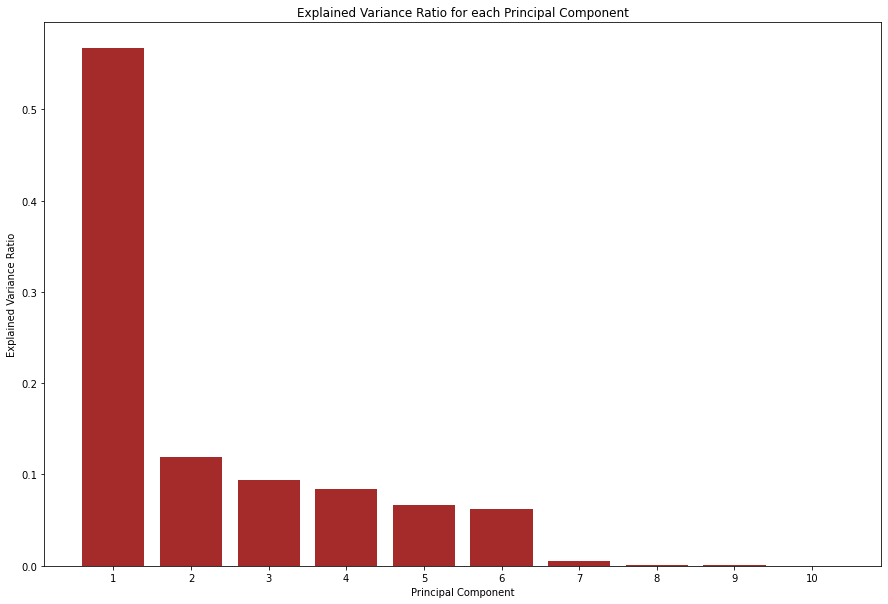

In [12]:
#Step 7

#Here we are showing a graph of variance ratio of each principal component

plt.figure(figsize=(15,10))
plt.bar(PC, PrincipalComponentAnalysis_applied.explained_variance_ratio_,color="Brown")
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for each Principal Component')
plt.xticks(PC)
plt.show()

In [13]:
# Putting components in a dataframe for later
PCA_components = pd.DataFrame(principalComponents)

In [14]:
#Step 8

#Elbow Method 
withinClustError = []
for n_clust in range(1,11):
   model_kmeans = KMeans(n_clusters = n_clust, 
                  init = "k-means++")
   model_kmeans.fit(X)
   withinClustError.append(model_kmeans.inertia_)

C:\Users\asd\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


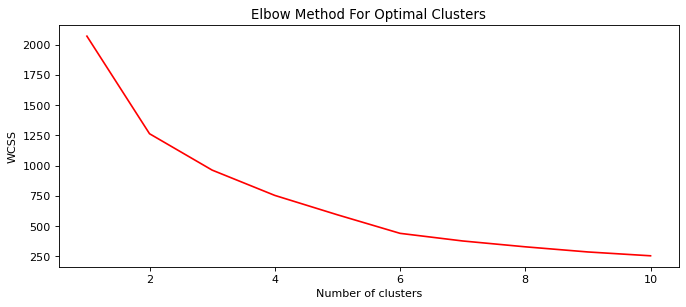

In [18]:
figure(figsize = (10, 4), 
       dpi = 80)
plt.plot(range(1,11),
         withinClustError,
        color='RED')
plt.title("Elbow Method For Optimal Clusters")
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [19]:
#Step 9

#Apply K - Means
#Having 6 clusters according to elbow method above are optimal

model_kmeans = KMeans(n_clusters = 6)
model_kmeans.fit(PCA_components.iloc[:,:6])

predictions = model_kmeans.predict(PCA_components.iloc[:,:6])
model_kmeans = KMeans(n_clusters = 6)
model_kmeans = KMeans(n_clusters = 6)
model_kmeans.fit(PCA_components.iloc[:,:6])

predictions = model_kmeans.predict(PCA_components.iloc[:,:6])

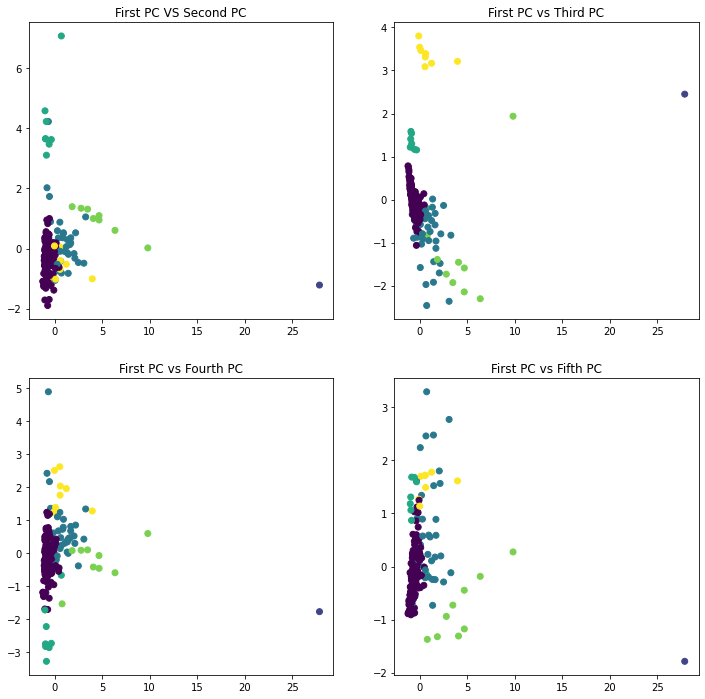

In [20]:
model_kmeans = KMeans(n_clusters=6)
model_kmeans.fit(PCA_components.iloc[:,:6])

labels = model_kmeans.labels_

fig, axs = plt.subplots(2, 2, figsize=(12, 12))
axs[0, 0].scatter(PCA_components[0], PCA_components[1], c=labels)
axs[0, 0].set_title('First PC VS Second PC')
axs[0, 1].scatter(PCA_components[0], PCA_components[2], c=labels)
axs[0, 1].set_title('First PC vs Third PC')
axs[1, 0].scatter(PCA_components[0], PCA_components[3], c=labels)
axs[1, 0].set_title('First PC vs Fourth PC')
axs[1, 1].scatter(PCA_components[0], PCA_components[4], c=labels)
axs[1, 1].set_title('First PC vs Fifth PC')
plt.show()


In [21]:
#Step 10

#Assign Each Observation To Cluster(new column in IKEA_df_cleaned data set)
IKEA_df_cleaned['Clusters'] = predictions
IKEA_df_cleaned.head()

,Year,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,Has_IKEA,Clusters
0,2010,1078,276,10059,719,0.071478,195.74174,111.075774,0,1,1,5
1,2010,3790,1621,62815,8716,0.138757,117.17365,390.516869,0,0,1,3
2,2010,4560,1910,85753,13308,0.155190,119.64794,469.856708,0,0,1,3
3,2010,1366,708,39289,4419,0.112474,96.69215,140.750935,0,0,0,0
4,2010,171,99,30114,3843,0.127615,86.56347,17.619627,0,0,0,0


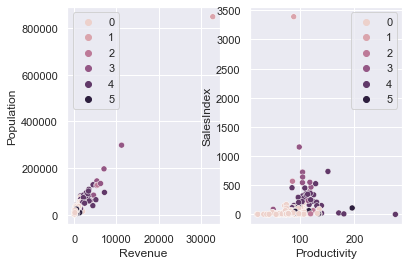

In [22]:
#Step 11

#Analyze CustUsing Population, Sales Index and Productivity
sns.set()
figure, axis = plt.subplots(1, 2)
sns.scatterplot(data = IKEA_df_cleaned, 
                x="Revenue", 
                y="Population", 
                hue = predictions,
               ax = axis[0])

sns.scatterplot(data = IKEA_df_cleaned, 
                x="Productivity", 
                y="SalesIndex", 
                hue = predictions,
               ax = axis[1])
plt.show()

In the above results, the first cluster has the highest revenue and sales index. So, will focus on this group and choose three random locations to establish a new setup. Here are the top locations that we have selected.

In [39]:
#filtering the rows of the DataFrame IKEA_df_cleaned where the value in the "Clusters" column is equal to 1, 
#and then displaying the first ten rows. 

IKEA_df_cleaned[IKEA_df_cleaned['Clusters'] == 1].head()

,Year,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,Has_IKEA,Clusters
19,2010,32897,18795,847073,191585,0.226173,87.7178,3389.665819,1,0,1,1


In [47]:
#Step 12

loc_1 = IKEA_df[IKEA_df['Population_University'] == 8716]
loc_2 = IKEA_df[IKEA_df['Population_University'] == 13308]
loc_3 = IKEA_df[IKEA_df['Population_University'] == 40476]
print("First proposed Location: ", loc_1['Kommun_name'])
print("Second proposed Location: ", loc_2['Kommun_name'])
print("Third proposed Location: ", loc_3['Kommun_name'])

First proposed Location:  1    Kalmar
Name: Kommun_name, dtype: object
Second proposed Location:  2    Karlstad
Name: Kommun_name, dtype: object
Third proposed Location:  33    Uppsala
Name: Kommun_name, dtype: object
